In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import bisect

precision scale 8
min
0 l2 0.0194284 op cat ap dog
1 l2 0.095453 op deer ap cat
2 l2 0.321533 op airplane ap bird
avg 0.944741 at 38
36 l2 0.942347 op ship ap deer
37 l2 0.947811 op frog ap deer
38 l2 0.94808 op frog ap dog


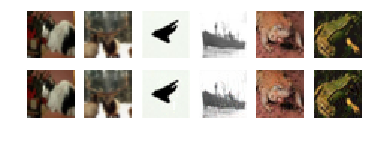

smoothing scale 32
min
0 l2 0.0272933 op bird ap cat
1 l2 0.053724 op frog ap cat
2 l2 0.0584689 op cat ap deer
avg 0.204688 at 55
53 l2 0.19835 op dog ap cat
54 l2 0.210895 op cat ap dog
55 l2 0.212489 op dog ap cat


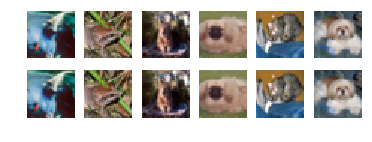

combined scale 8
min
0 l2 0.116992 op airplane ap bird
1 l2 0.12003 op deer ap cat
2 l2 0.130794 op horse ap cat
avg 0.610946 at 47
45 l2 0.604161 op truck ap airplane
46 l2 0.614392 op horse ap dog
47 l2 0.616504 op ship ap truck


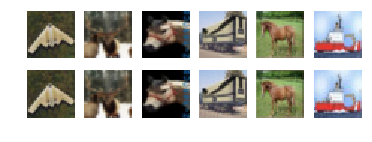

In [4]:
lblnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

orig_imgs = np.load('tttt/batch_unquantized_images.npy')

def l2d(x, y):
    return np.sqrt(np.sum(np.square(x - y)))
raw = matplotlib.colors.Normalize(-1., 1.)
#gs = gridspec.GridSpec(3, 5)
gs = gridspec.GridSpec(2, 6)

experiments = [
    ('precision', 'baseline2adv', '3bit', 'baseline2', 8),
    ('smoothing', 'adv', 'median', 'smoothing', 32),
    ('combined', 'adv', 'nofilter', 'combined', 8),
]
for exp, gen, filt, batch, scale in experiments:
    print exp, 'scale', scale
    adv_imgs = np.load('tttt/%s_adv_imgs.npy' % batch)
    ground_truth = np.argmax(np.load('tttt/batch_labels.npy'), 1)
    orig_pred = np.load('tttt/%s_orig_%s_preds.npy' % (exp, filt))
    adv_pred = np.load('tttt/%s_%s_%s_preds.npy' % (exp, gen, filt))
    d = zip(orig_imgs, adv_imgs, ground_truth, orig_pred, adv_pred)
    sd = sorted((l2d(oi, ai), oi, ai, op, ap) for oi, ai, gt, op, ap in d if op == gt and ap != gt)
    print 'min'
    plt.figure(figsize=(6, 2))
    for i in range(3):
        l2, oi, ai, op, ap = sd[i]
        print i, 'l2', l2, 'op', lblnames[op], 'ap', lblnames[ap]
        plt.subplot(gs[0, i])
        plt.imshow(oi)
        plt.axis('off')
        plt.subplot(gs[1, i])
        plt.imshow(ai)
        plt.axis('off')
        # plt.subplot(gs[2, i])
        # plt.imshow((ai - oi) * scale + 0.5)
        # plt.axis('off')
    avg = np.average([l2 for l2, oi, ai, op, ap in sd])
    idx = bisect.bisect_left(sd, (avg, None, None, 0, 0))
    print 'avg', avg, 'at', idx
    for i in range(3):
        l2, oi, ai, op, ap = sd[i + idx - 1]
        print i + idx - 2, 'l2', l2, 'op', lblnames[op], 'ap', lblnames[ap]
        plt.subplot(gs[0, i + 3])
        plt.imshow(oi)
        plt.axis('off')
        plt.subplot(gs[1, i + 3])
        plt.imshow(ai)
        plt.axis('off')
        # plt.subplot(gs[2, i + 3])
        # plt.imshow((ai - oi) * scale + 0.5)
        # plt.axis('off')
    plt.show()